# Conditionnement

On a vu que les calculs numériques impliquent nécessairement la
manipulation de données inexactes (pour cause de propagation d'arrondi
ou d'utilisation d'algorithmes itératifs). Un problème important est de
quantifier l'influence de ces inexactitudes sur les calculs, celle-ci
est caractérisée par le conditionnement des problèmes (en anglais
*condition number*, en général noté $\kappa$).

On caractérise généralement un algorithme de la façon suivante : soit
$y=f(x)$ le résultat de l'évaluation exacte de $f$ en $x$. Soit
$\hat{y}$ le résultat de l'évaluation en précision finie. Soit
$\Delta x$ le nombre tel que l'évaluation exacte de $f$ en $x+\Delta x$
donnerait $\hat{y}$. Voir la
figure ci-dessous.

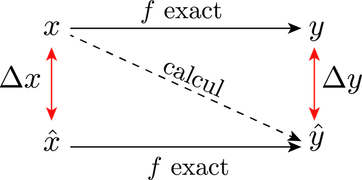

On appelle $y-\hat{y}$ l'erreur directe (*forward error*) et $\Delta x$
l'erreur rétrograde (*backward error*). Un algorithme tel que $\Delta x$
reste faible est dit rétrogradement stable.

Le conditionnement fait le lien entre l'erreur directe et l'erreur
rétrograde. En effet, on a : $$\begin{aligned}
\hat{y}-y = f(x+\Delta x) - f(x) = f'(x) \Delta x + O(\Delta x ^2) \\
\frac{\hat{y}-y}{y} = \frac{xf'(x)}{f(x)}\frac{\Delta x}{x} +  O(\Delta x ^2)
\end{aligned}$$ $\kappa=\left|\frac{xf'(x)}{f(x)}\right|$ est le
conditionnement de l'algorithme, il donne la variation relative
maximale, il borne la propagation des erreurs. On a la règle empirique :
$$\text{erreur directe} \lesssim \kappa \times \text{erreur retrograde}$$

On peut donc parler du conditionnement de n'importe quel problème
mathématique (calcul des zéros d'une fonction, recherche de minimal,
...). Par la suite on se focalise sur deux problèmes fondamentaux du
calcul numérique : la résolution de systèmes linéaires (abusivement
nommés inversion de matrice) et le calcul de valeurs et vecteurs
propres.

## Conditionnement d'un système linéaire

**Exemple 3.1**. Cet exemple a été proposé par R.S. Wilson (apparaît dans un article de Morris de 1946 (https://doi.org/10.1080/14786444608561331), dans lequel il est décrit comme ayant été "conçu par M. R. S. Wilson"). Soit :

$${\mathbf{A}} = 
    \begin{pmatrix} 
    10 & 7 & 8  & 7\\
    & 5 & 6  & 5\\
    &   & 10 & 9\\
    \text{sym}  &   &    & 10
    \end{pmatrix}\qquad {\mathbf{b}} = \begin{pmatrix} 32\\23\\33\\31\end{pmatrix} \qquad  {\mathbf{\delta b}}= \begin{pmatrix} 0.1\\-0.1\\0.1\\-0.1\end{pmatrix} \qquad
    {\mathbf{\Delta A}} = 
    \begin{pmatrix} 
    0 & 0 & 0.1  & 0.2\\
    0.08 & 0.04 & 0  & 0\\
    0  & -0.02  & -0.11 & 0\\
    -0,01 & -0,01 &  0  & -0,02
    \end{pmatrix}$$ 
    
Résoudre numériquement

${\mathbf{A}}{\mathbf{u}}={\mathbf{b}}$,

${\mathbf{A}}({\mathbf{u}}+{\mathbf{\delta u}})={\mathbf{b}}+{\mathbf{\delta b}}$

et $({\mathbf{A}}+{\mathbf{\Delta A}})({\mathbf{u}}+{\mathbf{\Delta u}})={\mathbf{b}}$.

Comparer les normes 2 des variations solutions relativement aux normes 2 des variations du second membre et de la matrice. 

In [1]:
import numpy as np
from numpy import linalg as la

A = np.matrix([
     [10., 7., 8., 7.],
     [7., 5., 6., 5.],
     [8., 6., 10., 9.],
     [7., 5., 9., 10.]])
b= np.transpose([32., 23., 33., 31.])

DELTAA = np.matrix([[0., 0., 0.1, 0.2],
     [0.08, 0.04, 0., 0.],
     [0., -0.02, -0.11, 0.],
     [-0.01, -0.01, 0., -0.02]])

deltab= np.transpose([0.1, -0.1, 0.1, -0.1])

u=la.solve(A,b)
print(u)

deltau = la.solve(A,b+deltab)-u
print(deltau)

DELTAu = la.solve(A+DELTAA,b)-u
print(DELTAu)
print()
print(la.inv(A))


print()
print('Perturbation de\t\t', 'Perturbation de')
print("deltab \t","{:.1e}".format(la.norm(deltab,2)/la.norm(b,2)),"\t deltau ",round(la.norm(deltau,2)/la.norm(u,2),1))
print("DELTAA \t","{:.1e}".format(la.norm(DELTAA,2)/la.norm(A,2)),"\t DELTAu ",round(la.norm(DELTAu,2)/la.norm(u,2),1))

[1. 1. 1. 1.]
[  8.2 -13.6   3.5  -2.1]
[-82. 136. -35.  21.]

[[ 25. -41.  10.  -6.]
 [-41.  68. -17.  10.]
 [ 10. -17.   5.  -3.]
 [ -6.  10.  -3.   2.]]

Perturbation de		 Perturbation de
deltab 	 3.3e-03 	 deltau  8.2
DELTAA 	 7.6e-03 	 DELTAu  82.0


On résout
${\mathbf{A}}{\mathbf{u}}={\mathbf{b}}$,
${\mathbf{A}}({\mathbf{u}}+{\mathbf{\delta u}})={\mathbf{b}}+{\mathbf{\delta b}}$
et
$({\mathbf{A}}+{\mathbf{\Delta A}})({\mathbf{u}}+{\mathbf{\Delta u}})={\mathbf{b}}$.
On a $${\mathbf{u}}=\begin{pmatrix}
    1\\1\\1\\1
    \end{pmatrix}
    \qquad {\mathbf{\delta u}} = \begin{pmatrix}
    8.2\\-13.6\\3.5\\-2.1
    \end{pmatrix},\qquad {\mathbf{\Delta u}} = \begin{pmatrix}
    -82\\136\\-35\\21
    \end{pmatrix}, \qquad \text{au passage }{\mathbf{A}}^{-1}=\begin{pmatrix} 
    25 & -41 & 10  & -6\\
    & 68 & -17  & 10\\
    &   & 5 & -3\\
    \text{sym}  &   &    & 2
    \end{pmatrix}$$ On voit qu'une perturbation de $3.3\;10^{-3}$ sur la
norme 2 du second membre conduit à une variation d'environ $8$ sur la norme 2
de la solution et qu'une perturbation de $7.6\;10^{-3}$ sur la norme 2 de
la matrice conduit à une variation d'environ $80$ sur la norme 2 de la
solution (ce qui colle assez bien avec les propriétés du conditionnement
décrites dans la prochaine section,
${\kappa_{2}(\mathbf{A})}\simeq3000$ et
${\kappa_{1}(\mathbf{A})}={\kappa_{\infty}(\mathbf{A})}\simeq 4500$).


### Caractérisation classique

**Définition 3.1**. Pour une norme subordonnée, on appelle
conditionnement de la matrice ${\mathbf{A}}$ le nombre
${\kappa(\mathbf{A})}=\|{\mathbf{A}}\|\|{\mathbf{A}}^{-1}\|$,
remarquons dès à présent que le conditionnement est une notion
dépendante de la norme utilisée (si besoin est, on peut le noter
${\kappa_{p}(\mathbf{A})}$). Par convention une matrice
singulière a un conditionnement infini.

Soit une matrice ${\mathbf{A}}$ *inversible*, on compare la
solution d'un système linéaire dont on a perturbé le second membre avec
le système original. $$\begin{aligned}
{\mathbf{A}}{\mathbf{u}}&={\mathbf{b}}\\
{\mathbf{A}}({\mathbf{u}}+{\mathbf{\delta u}})&={\mathbf{b}}+{\mathbf{\delta b}}
\end{aligned}$$



**Proposition 3.1**. *On suppose ${\mathbf{b}}\neq0$, pour
n'importe quelle norme subordonnée, on a :
$$\frac{\|{\mathbf{\delta u}}\|}{\|{\mathbf{u}}\|}\leqslant{\kappa(\mathbf{A})}\frac{\|{\mathbf{\delta b}}\|}{\|{\mathbf{b}}\|}$$
c'est une borne exacte (il existe une perturbation pour laquelle le
résultat est une égalité).*


*Proof.* On a
${\mathbf{\delta u}}={\mathbf{A}}^{-1}{\mathbf{\delta b}}$
et donc
$\|{\mathbf{\delta u}}\|\leqslant \|{\mathbf{A}}^{-1}\|\|{\mathbf{\delta b}}\|$.
On a de plus
$\|{\mathbf{b}}\|\leqslant \|{\mathbf{A}}\|\|{\mathbf{u}}\|$. ◻

Vérifier cette propriété dans le cas de l'exemple 3.1 pour les 3 normes 1, 2 et $\infty$

In [2]:
import numpy as np
from numpy import linalg as la
from IPython.display import display, Latex

A = np.matrix([
     [10., 7., 8., 7.],
     [7., 5., 6., 5.],
     [8., 6., 10., 9.],
     [7., 5., 9., 10.]])
b= np.transpose([32., 23., 33., 31.])

deltab= np.transpose([0.1, -0.1, 0.1, -0.1])

u=la.solve(A,b)
deltau = la.solve(A,b+deltab)-u

def condit(M,i):
    return la.norm(M,i)*la.norm(la.inv(M),i)

display(Latex('$\\frac{||\delta \mathbf{u}||}{||\mathbf{u}||} \qquad\qquad\qquad \kappa(\mathbf{A})\\frac{||\mathbf{\delta b}||}{||\mathbf{b}||}$'))
print('Norme 1')
print("{:.5f}".format(la.norm(deltau,1)/la.norm(u,1)),"\t","{:.5f}".format(condit(A,1)*la.norm(deltab,1)/la.norm(b,1)) )
print('Norme 2')
print("{:.5f}".format(la.norm(deltau,2)/la.norm(u,2)),"\t","{:.5f}".format(condit(A,2)*la.norm(deltab,2)/la.norm(b,2)) )
print('Norme Inf')
print("{:.5f}".format(la.norm(deltau,np.inf)/la.norm(u,np.inf)),"\t","{:.5f}".format(condit(A,np.inf)*la.norm(deltab,np.inf)/la.norm(b,np.inf)) )


<IPython.core.display.Latex object>

Norme 1
6.85000 	 15.08571
Norme 2
8.19848 	 9.94283
Norme Inf
13.60000 	 13.60000


On étudie maintenant l'effet d'une perturbation de la matrice sur la
solution : $$\begin{aligned}
{\mathbf{A}}{\mathbf{u}}&={\mathbf{b}}\\
({\mathbf{A}}+{\mathbf{\Delta A}})({\mathbf{u}}+{\mathbf{\Delta u}})&={\mathbf{b}}
\end{aligned}$$

**Proposition 3.2**. *En supposant ${\mathbf{b}}\neq0$, on a
:
$$\frac{\|{\mathbf{\Delta u}}\|}{\|{\mathbf{u}}+{\mathbf{\Delta u}}\|}\leqslant{\kappa(\mathbf{A})}\frac{\|{\mathbf{\Delta A}}\|}{\|{\mathbf{A}}\|}$$
là encore l'égalité peut être atteinte.*


*Proof.* Le système donne
${\mathbf{A}}{\mathbf{\Delta u}}+{\mathbf{\Delta A}}({\mathbf{u}}+{\mathbf{\Delta u}})=0$
et donc
${\mathbf{\Delta u}}=-{\mathbf{A}}^{-1}{\mathbf{\Delta A}}({\mathbf{u}}+{\mathbf{\Delta u}})$
qui conduit à
$\|{\mathbf{\Delta u}}\|\leqslant \|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|\|{\mathbf{u}}+{\mathbf{\Delta u}}\|={\kappa(\mathbf{A})}\frac{\|{\mathbf{\Delta A}}\|}{\|{\mathbf{A}}\|}\|{\mathbf{u}}+{\mathbf{\Delta u}}\|$ ◻

Vérifier également cette propriété dans le cas de l'exemple 3.1 pour les 3 normes 1, 2 et $\infty$

In [3]:
import numpy as np
from numpy import linalg as la
from IPython.display import display, Latex

A = np.matrix([
     [10., 7., 8., 7.],
     [7., 5., 6., 5.],
     [8., 6., 10., 9.],
     [7., 5., 9., 10.]])
b= np.transpose([32., 23., 33., 31.])

DELTAA = np.matrix([[0., 0., 0.1, 0.2],
     [0.08, 0.04, 0., 0.],
     [0., -0.02, -0.11, 0.],
     [-0.01, -0.01, 0., -0.02]])

u=la.solve(A,b)
deltau = la.solve(A+DELTAA,b)-u

def condit(M,i):
    return la.norm(M,i)*la.norm(la.inv(M),i)

display(Latex('$\\frac{||\Delta \mathbf{u}||}{||\mathbf{u}+\Delta \mathbf{u}||} \qquad\qquad\;\; \kappa(\mathbf{A})\\frac{||\mathbf{\Delta A}||}{||\mathbf{A}||}$'))
print('Norme 1')
print("{:.5f}".format(la.norm(deltau,1)/la.norm(u+deltau,1)),"\t","{:.5f}".format(condit(A,1)*la.norm(DELTAA,1)/la.norm(A,1)) )
print('Norme 2')
print("{:.5f}".format(la.norm(deltau,2)/la.norm(u+deltau,2)),"\t","{:.5f}".format(condit(A,2)*la.norm(DELTAA,2)/la.norm(A,2)) )
print('Norme Inf')
print("{:.5f}".format(la.norm(deltau,np.inf)/la.norm(u+deltau,np.inf)),"\t","{:.5f}".format(condit(A,np.inf)*la.norm(DELTAA,np.inf)/la.norm(A,np.inf)) )


<IPython.core.display.Latex object>

Norme 1
1.00000 	 29.92000
Norme 2
0.99844 	 22.74147
Norme Inf
0.99270 	 40.80000


**Proposition 3.3**. *On peut arranger le premier membre et obtenir :
$$\frac{\|{\mathbf{\Delta u}}\|}{\|{\mathbf{u}}\|}\leqslant{\kappa(\mathbf{A})}\frac{\|\Delta {\mathbf{A}}\|}{\|{\mathbf{A}}\|}(1+O(\|{\mathbf{\Delta A}}\|)$$*


*Proof.* On suppose que la perturbation reste petite telle que
$\|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|<1$
de sorte que
$({\mathbf{I}}+{\mathbf{A}}^{-1} {\mathbf{\Delta A}})$
est inversible et
$\|({\mathbf{I}}+{\mathbf{A}}^{-1}{\mathbf{\Delta A}})^{-1}\|\leqslant \frac{1}{1-\|{\mathbf{A}}^{-1}{\mathbf{\Delta A}}\|}\leqslant \frac{1}{1-\|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|}$.
On a
${\mathbf{\Delta u}}=-{\mathbf{A}}^{-1}{\mathbf{\Delta A}}({\mathbf{u}}+{\mathbf{\Delta u}})$
et par ailleurs
$({\mathbf{A}}+{\mathbf{\Delta A}})({\mathbf{u}}+{\mathbf{\Delta u}})={\mathbf{A}}{\mathbf{u}}$
donc
${\mathbf{u}}+{\mathbf{\Delta u}} = ({\mathbf{I}}+ {\mathbf{A}}^{-1}{\mathbf{\Delta A}})^{-1} {\mathbf{u}}$.
Donc $$\begin{aligned}
    {\mathbf{\Delta u}} &= -{\mathbf{A}}^{-1}{\mathbf{\Delta A}}({\mathbf{I}}+ {\mathbf{A}}^{-1}{\mathbf{\Delta A}})^{-1} {\mathbf{u}}
    \\\|{\mathbf{\Delta u}}\|
    &\leqslant \frac{\|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|}{1-\|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|}\|{\mathbf{u}}\|\\
    \frac{\|{\mathbf{\Delta u}}\|}{\|{\mathbf{u}}\|}&\leqslant {\kappa(\mathbf{A})} \frac{\|{\mathbf{\Delta A}}\|}{\|{\mathbf{A}}\|}\left(\frac{1}{1-\|{\mathbf{A}}^{-1}\|\|{\mathbf{\Delta A}}\|}\right)
    \end{aligned}$$ ◻

**Proposition 3.4**. *On a les résultats importants suivants
$\forall {\mathbf{A}}$: $$\begin{aligned}
    {\kappa(\mathbf{A})}&\geqslant 1\\
    {\kappa(\mathbf{A})}&={\kappa(\mathbf{A^{-1}})}\\
    {\kappa(\mathbf{\alpha A})}&={\kappa(\mathbf{A})}, \ \text{pour tout scalaire } \alpha\\
    {\kappa_{2}(\mathbf{A})} &=\frac{\sigma_1}{\sigma_n},\quad (\sigma_n\leqslant\cdots\leqslant\sigma_1) \text{ valeurs singulières de }{\mathbf{A}}\\
    \text{Si }{\mathbf{A}}\text{ est normale, } {\kappa_{2}(\mathbf{A})}&=\frac{\max|\lambda_i|}{\min|\lambda_i|},\quad (\lambda_i) \text{ valeurs propres de }{\mathbf{A}}\\
    \text{Si }{\mathbf{A}}\text{ est unitaire ou orthogonale, } {\kappa_{2}(\mathbf{A})}&=1
    \end{aligned}$$*



**Proposition 3.5**. *${\kappa_{2}(\mathbf{A})}$ est
invariant par transformation unitaire :
$${\mathbf{U}}^H{\mathbf{U}}={\mathbf{U}}{\mathbf{U}}^H={\mathbf{I}}\Rightarrow {\kappa_{2}(\mathbf{A})}={\kappa_{2}(\mathbf{UA})}={\kappa_{2}(\mathbf{AU})}={\kappa_{2}(\mathbf{U^HAU})}$$*

Ce dernier résultat indique l'importance des transformations unitaires
en analyse numérique puisqu'elles ne détériorent pas le conditionnement
(voir donc les algorithmes faisant intervenir les rotations de Givens ou
les réflexions de Householder).

En mécanique des structures il est possible de relier le
conditionnement, entre autres, à l'élancement (*aspect ratio*) des
structures, à la présence d'hétérogénéités, à l'incompressibilité, aux
interfaces irrégulières...

Vérifier sur quelques exemples les résultats importants énoncés précédemment.

In [4]:
import numpy as np
from numpy import linalg as la
from IPython.display import display, Latex

n=10
# A est une matrice symétrique, définie et positive
A = np.random.random((n, n))
A=A*A.transpose()+n*np.identity(n)
# B est une matrice orthogonale
H = np.random.random((n, n))+n*np.identity(n)
u, s, vh = np.linalg.svd(H, full_matrices=False)
B = u.dot(vh)

def condit(M,i):
    return la.norm(M,i)*la.norm(la.inv(M),i)

display(Latex("$\kappa(\mathbf{A})=\kappa(\mathbf{A^{-1}})$"))
print("norme 1\t\t", condit(A,1), condit(la.inv(A),1))
print("norme inf\t", condit(A,np.inf), condit(la.inv(A),np.inf))


display(Latex("$\kappa_{2}(\mathbf{A}) = \\frac{\sigma_1}{\sigma_n}$"))
ua, sa, vha = np.linalg.svd(A, full_matrices=False)
print("norme 2 \t\t", condit(A,2))
print("rapport valeurs sing. \t", sa[0]/sa[-1])

display(Latex("$\kappa_{2}(\mathbf{A})=\\frac{\max|\lambda_i|}{\min|\lambda_i|}$"))
print("norme 2 \t\t", condit(A,2))
valpro = la.eigvals(A)
print("rapport valeurs propres\t", np.max(abs(valpro))/np.min(abs(valpro)))


display(Latex("$\kappa_{2}(\mathbf{B})=1$"))
print("norme 2 \t", condit(B,2))

<IPython.core.display.Latex object>

norme 1		 1.7000134066110477 1.7000134066110482
norme inf	 1.700013406611048 1.7000134066110484


<IPython.core.display.Latex object>

norme 2 		 1.4468632828924377
rapport valeurs sing. 	 1.4468632828924377


<IPython.core.display.Latex object>

norme 2 		 1.4468632828924377
rapport valeurs propres	 1.4468632828924397


<IPython.core.display.Latex object>

norme 2 	 1.0000000000000002


### Scaling

La précision de nombreuses opérations dépend du conditionnement de la
matrice d'entrée. Par exemple, la factorisation de Cholesky d'une
matrice symétrique définie positive
${\mathbf{A}}={\mathbf{L}}{\mathbf{L}}^T$
est rétrogradement stable (ce qui est parfait pour résoudre un système)
mais l'erreur directe est de la forme
$\|{\mathbf{L}}-\hat{{\mathbf{L}}}\|/\|{\mathbf{L}}\|\simeq u \kappa({\mathbf{A}})$,
où $u$ est l'erreur d'arrondi introduite au chapitre précédent. On a
donc intérêt à essayer d'améliorer le conditionnement des matrices avant
d'appliquer dessus de nombreuses opérations.

Pour cela on utilise des matrices d'équilibrage (*scaling*). On écrit
${\mathbf{A}}={\mathbf{D_g}}{\mathbf{\tilde{A}}}{\mathbf{D_d}}$
avec ${\mathbf{D_g}}$ et ${\mathbf{D_d}}$ deux
matrices diagonales (donc très faciles à manipuler) rendant
${\mathbf{\tilde{A}}}$ de conditionnement faible. Il n'y a
pas de recette absolue, trouver les matrices d'équilibrage qui
minimisent le conditionnement est un problème très complexe (qui dépend
de la matrice et de la norme utilisée).

Une idée classique consiste à essayer de rendre chaque ligne ou chaque
colonne du même ordre de grandeur (en norme infinie). Pour les matrices
symétriques définies positives avec de gros coefficient diagonaux on
peut prendre la racine de la diagonale.

**Exemple 3.2** Soit ${\mathbf{A}}$ une matrice mal conditionnée.  On propose de réaliser le scaling de la façon suivante.

a) Équilibrage des lignes $i$.
On divise chaque ligne $i$ par $\max_{j}|a_{ij}|$
Montrer que cela revient à résoudre le système linéaire $\mathbf{R}\mathbf{A}\mathbf{x}= \mathbf{R}\mathbf{b}$ avec $\mathbf{R}$ un matrice diagonale vérifiant $r_{ii}=\frac{1}{\max_{1\leq k \leq n} |a_{ik}|}$

b) Équilibrage des colonnes $j$.
On divise chaque ligne j par $\max_{i}|a_{ij}|$
Montrer que cela revient à résoudre le système linéaire $(\mathbf{A}\mathbf{C})\mathbf{C}^{-1}x= \mathbf{b}$ avec $\mathbf{C}$ un matrice diagonale vérifiant $c_{ii}=\frac{1}{\max_{1\leq k \leq n} |a_{ki}|}$

Le système lorsqu'on effectue les 2 opérations devient alors $(\mathbf{R}\mathbf{A}\mathbf{C})(\mathbf{C}^{-1}x)= \mathbf{R}\mathbf{b}$ qui se résoud en 2 temps. On détermine d'abord $\mathbf{C}^{-1}x$ dont on déduit ensuite $x$ en multipliant le résultat par $\mathbf{C}$.

Appliquer cette méthode avec : 
${\mathbf{A}} =\begin{pmatrix} 
    10 & 100\\
    0,1 & 0,2
    \end{pmatrix}$
et 
${\mathbf{b}} =\begin{pmatrix} 
    10 \\
    1 
    \end{pmatrix}$. On calculera le conditionnement du sytème d'origine et du système modifié.

In [12]:
import numpy as np
from numpy import linalg as la

A = np.array([
     [10., 100.],
     [0.1, 0.2]])
b= np.transpose([10., 1.])

def eqcol(M):
    return np.diag(1/np.amax(np.abs(M), axis=1))

def eqlig(M):
    return np.diag(1/np.amax(np.abs(M), axis=0))

R=eqcol(A)
C=eqlig(A)

print("R", R)
print("C", C)

# Resolution syteme d'origine
x = la.solve(A,b)
print(x)
print(la.inv(A) @ b)
print(la.cond(A))

# Resolution syteme modifie
y = la.solve(R @ A @ C,R @b)
x = C @ y
print(x)
print(la.cond(R @ A @ C))

n=500
# A est une matrice symétrique, définie et positive
A = np.random.random((n, n))
A=A*A.transpose()+n*np.identity(n)
A[5,:]= 1.E200
b= 1E30*np.random.random((n,1))

R=eqcol(A)
C=eqlig(A)

# Resolution syteme d'origine
xo = la.solve(A,b)
xo = la.inv(A) @ b
print(la.cond(A))

# Resolution syteme modifie
y = la.solve(R @ A @ C,R @ b)
xm = C @ y
print(la.cond(R @ A @ C))

print(la.norm(xo-xm))
print(np.allclose(xo,xm))

R [[0.01 0.  ]
 [0.   5.  ]]
C [[0.1  0.  ]
 [0.   0.01]]
[12.25  -1.125]
[12.25  -1.125]
1262.5054579242162
[12.25  -1.125]
6.854101966249679
7.990955480475443e+199
513.7014908764253
79578224259770.55
True


### Remarque sur le déterminant

Le déterminant n'est pas utilisable pour caractériser la
non-inversibilité d'une matrice.

**Exemple 3.3**. $$\begin{pmatrix}
    1 & -1 & \cdots & -1 \\
    0 & 1 & \cdots & -1 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & 1 
    \end{pmatrix}\in {\mathbb{R}}^{n\times n}$$ a un
déterminant de $1$ et un conditionnement de $n2^{n-1}$.

**Exemple 3.4**.
${\mathbf{D}}_n={{\mathbf{\operatorname{diag}}}}(10^{-1},\cdots,10^{-1})\in {\mathbb{R}}^{n\times n}$
a un ${\kappa_{p}(\mathbf{D_n})}=1$ et un déterminant
$\det({\mathbf{D}}_n)=10^{-n}$.

Evaluer numériquement les déterminants et conditionnements des deux matrices des exemples 3.3 et 3.4.

In [43]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

def condit(M,i):
    return la.norm(M,i)*la.norm(la.inv(M),i)

n=8
A = np.transpose(-np.tri(n, n, -1)+np.eye(n))
print(A)
print(la.det(A))
print(la.norm(A,1)*la.norm(la.inv(A),1),n*2**(n-1))
print()
D = 1E-1*np.eye(n)
print(D)
print(la.det(D), np.prod(np.diag(1E-1*np.eye(n))))
print(condit(D,1),condit(D,2),condit(D,np.inf))

[[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]
1.0
1024.0 1024

[[0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1]]
1.0000000000000018e-08 1.0000000000000005e-08
1.0 1.0 1.0


## Conditionnement d'un problème aux valeurs propres

**Exemple 3.5**. $$\begin{pmatrix}
    0 &   &   &   & \varepsilon \\
    1 & 0 &   &   & \\
    & 1 & 0 &   & \\
    &   & \ddots & \ddots & \\
    &   &   & 1 &  0
    \end{pmatrix}$$ Si $\varepsilon=0$ toutes les valeurs propres sont
nulles, si $\varepsilon=10^{-n}$ toutes les valeurs propres valent
$10^{-1}$, soit un conditionnement de $10^{n-1}$. De plus si $10^{-n}$
est hors précision machine (disons $n\simeq 40$), alors il sera arrondi
à $0$ ce qui signifie que les valeurs propres seront fausses de
$10^{-1}$ (erreur absolue).

Soit ${\mathbf{A}}$ une matrice diagonalisable,
${\mathbf{P}}$ une matrice telle que
$${\mathbf{P}}^{-1}{\mathbf{A}}{\mathbf{P}}={\operatorname{diag}}{\lambda_i}={\mathbf{D}}$$
et une norme matricielle telle que
$$\|{{\mathbf{\operatorname{diag}}}}(d_i)\|=\max_i|d_i|$$
pour toute matrice diagonale (propriété vérifiée par les normes $1$, $2$
et $\infty$).

**Proposition 3.6**. *Alors pour toute matrice
${\mathbf{\delta A}}$, $$\begin{aligned}
    \operatorname{sp}({\mathbf{A}}+{\mathbf{\delta A}})&\subset \bigcup_{i=1}^n D_i\\
    \text{avec } D_i &= \{z\in{\mathbb{C}};\ |z-\lambda_i|\leqslant {\kappa(\mathbf{P})}\|{\mathbf{\delta A}}\|\}
    \end{aligned}$$*


*Proof.* Soit $\lambda$ une valeur propre de
$({\mathbf{A}}+{\mathbf{\delta A}})$ avec
$\lambda\neq\lambda_i$ quel que soit $i$ (la valeur propre a donc été
perturbée par ${\mathbf{\delta A}}$). On a donc
$({\mathbf{D}}-\lambda {\mathbf{I}})$ inversible
et
$${\mathbf{P}}^{-1}({\mathbf{A}}+{\mathbf{\delta A}}-\lambda{\mathbf{I}}){\mathbf{P}} ={\mathbf{D}}-\lambda{\mathbf{I}}+{\mathbf{P}}^{-1}{\mathbf{\delta A}}{\mathbf{P}}
    =({\mathbf{D}}-\lambda{\mathbf{I}})({\mathbf{I}}+({\mathbf{D}}-\lambda{\mathbf{I}})^{-1}{\mathbf{P}}^{-1}{\mathbf{\delta A}}{\mathbf{P}})$$
La matrice
${\mathbf{I}}+({\mathbf{D}}-\lambda{\mathbf{I}})^{-1}{\mathbf{P}}^{-1}{\mathbf{\delta A}}{\mathbf{P}}$
n'est pas inversible (puisque
$({\mathbf{A}}+{\mathbf{\delta A}}-\lambda{\mathbf{I}})$
ne l'est pas) et donc
$$1\leqslant\|({\mathbf{D}}-\lambda{\mathbf{I}})^{-1}{\mathbf{P}}^{-1}{\mathbf{\delta A}}{\mathbf{P}}\|\leqslant\|({\mathbf{D}}-\lambda{\mathbf{I}})^{-1}\|\|{\mathbf{P}}^{-1}\|\|{\mathbf{\delta A}}\|\|{\mathbf{P}}\|$$
or d'après l'hypothèse sur la norme
matricielle$\|({\mathbf{D}}-\lambda{\mathbf{I}})^{-1}\|=\frac{1}{\min|\lambda_i-\lambda|}$
donc il existe au moins un $i$ tel que
$$|\lambda_i-\lambda|\leqslant \|{\mathbf{P}}^{-1}\|\|{\mathbf{\delta A}}\|\|{\mathbf{P}}\|={\kappa(\mathbf{P})}\|{\mathbf{\delta A}}\|$$ ◻

Donc le conditionnement d'un problème aux valeurs propres est la valeur
$\inf\{{\kappa(\mathbf{P})};\ {\mathbf{P}}^{-1}{\mathbf{A}}{\mathbf{P}}={{\mathbf{\operatorname{diag}}}}(\lambda_i)\}$.
En conséquence une matrice normale (et en particulier hermitienne) est
parfaitement conditionnée (en norme 2) pour un problème aux valeurs
propres puisqu'elle se diagonalise dans un changement de base unitaire.

**Proposition 3.7**. *Si ${\mathbf{A}}$ et
${\mathbf{B}}={\mathbf{A}}+{\mathbf{\delta A}}$
sont deux matrices hermitiennes, de valeurs propres (ordonnées)
respectives $(\alpha)_i$ et $(\beta)_i$
$$|\alpha_k-\beta_k|\leqslant\|{\mathbf{\delta A}}\|_2$$ Ce
résultat est plus fort que le précédent qui dirait simplement que pour
tout $k$ il existe $i$ tel que
$|\alpha_k-\beta_i|\leqslant\|{\mathbf{\delta A}}\|_2$.*


*Proof.* On utilise le quotient de Rayleigh, $E_k$ est l'espace propre
engendré par les $k$ premiers vecteurs propres et $\mathcal{E}_k$
l'ensemble des sous-espaces de dimension $k$, on a $$\begin{aligned}
    \beta_k = \min_{\mathbb{V}\in\mathcal{E}_{k-1}}\max_{{\mathbf{v}}\perp \mathbb{V}}  R_{{\mathbf{B}}}({\mathbf{v}}) &\leqslant 
    \max_{{\mathbf{v}}\perp \mathbb{E}_{k-1}} R_{{\mathbf{B}}}({\mathbf{v}})= \max_{{\mathbf{v}}\perp \mathbb{E}_{k-1}} (R_{{\mathbf{A}}}({\mathbf{v}})+R_{{\mathbf{\delta A}}}({\mathbf{v}}))\\
    &\leqslant \max_{{\mathbf{v}}\perp \mathbb{E}_{k-1}} R_{{\mathbf{A}}}({\mathbf{v}})+  \max_{{\mathbf{v}}\perp \mathbb{E}_{k-1}} R_{{\mathbf{\delta A}}}({\mathbf{v}})= \alpha_k +\max_{{\mathbf{v}}\perp \mathbb{E}_{k-1}} R_{{\mathbf{\delta A}}} ({\mathbf{v}})\\&\leqslant \alpha_k +\max_{{\mathbf{v}}\in \mathbb{E}} R_{{\mathbf{\delta A}}}({\mathbf{v}})\leqslant \alpha_k +\|{\mathbf{\delta A}}\|_2
    \end{aligned}$$ On peut faire le même calcul en échangeant $\beta_k$
et $\alpha_k$ (en utilisant $-{\mathbf{\delta A}}$), ce qui
permet de conclure. ◻

Appliquer cette proposition au cas de l'exemple 3.1 

In [45]:
import numpy as np
from numpy import linalg as la

A = np.matrix([
     [10., 7., 8., 7.],
     [7., 5., 6., 5.],
     [8., 6., 10., 9.],
     [7., 5., 9., 10.]])

DeltaA = np.matrix([[0., 0., 0.1, 0.2],
     [0.08, 0.04, 0., 0.],
     [0., -0.02, -0.11, 0.],
     [-0.01, -0.01, 0., -0.02]])

vpa = np.sort(la.eigvals(A))
vpb = np.sort(la.eigvals(A+DeltaA))

print('Différences des valeurs propres')
print(np.abs(vpa-vpb))
print('Norme 2')
print(la.norm(DeltaA,2))


Différences des valeurs propres
[0.00994389 0.062886   0.07535469 0.05818459]
Norme 2
0.2308270538811954
